In [1]:
!pip install pandas numpy seaborn scikit-learn annoy

import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

In [2]:
all_beauty = pd.read_csv("all_beauty.csv")
common = all_beauty[all_beauty["asin"] != all_beauty["parent_asin"]]
print(format(common.size, ","), format(all_beauty.size, ','), format(all_beauty.size - common.size, ','))

611,880 7,015,280 6,403,400


In [3]:
all_beauty.isna().sum()

rating                 0
title                160
text                 212
images                 0
asin                   0
parent_asin            0
user_id                0
timestamp              0
helpful_vote           0
verified_purchase      0
dtype: int64

In [4]:
review_data = all_beauty.drop(columns=["title", "text", "images", "timestamp", "helpful_vote", "asin", "verified_purchase"])
review_data

,rating,parent_asin,user_id
0,5.0,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ
1,4.0,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ
2,5.0,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ
3,1.0,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
4,5.0,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
...,...,...,...
701523,4.0,B006YUIWKA,AFIXGFVEGLMOTMBTJL7H3VSIETDQ
701524,1.0,B006YUIWKA,AFV7YZFOJF564EZGET5LG45K4QEA
701525,5.0,B06ZZV9MZT,AHYDCWDMMVMLBX7FY7M7JKADKRDQ
701526,5.0,B000HB6VLE,AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ


In [5]:
review_data.isna().sum()

rating         0
parent_asin    0
user_id        0
dtype: int64

In [6]:
# review_data[review_data["verified_purchase"] == False].count()

In [7]:
review_data.describe()['rating']

count    701528.000000
mean          3.960245
std           1.494452
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [8]:
print(f'Minimum rating is: {review_data.rating.min()}')
print(f'Maximum rating is: {review_data.rating.max()}')

Minimum rating is: 1.0
Maximum rating is: 5.0


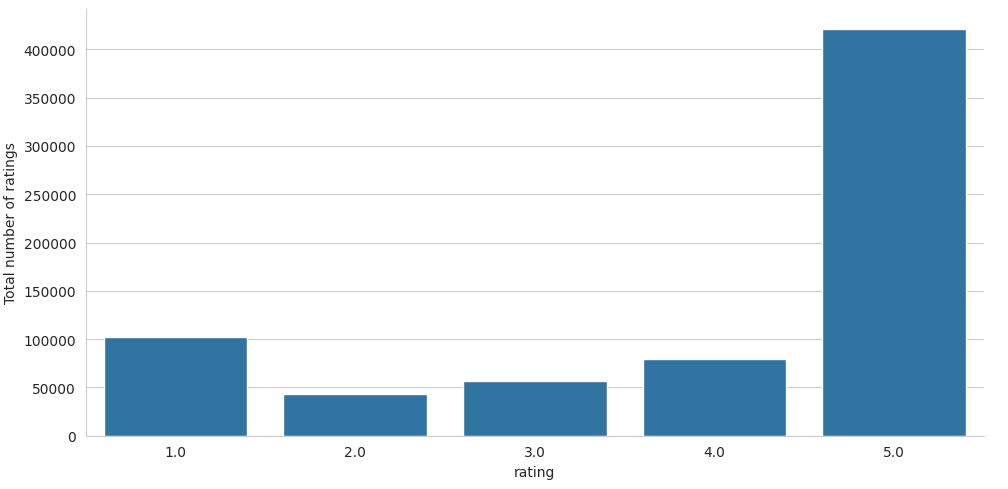

In [9]:
with sns.axes_style('whitegrid'):
    g = sns.catplot(
        x="rating",
        data=review_data,
        aspect=2.0,
        kind='count'
    )
    g.set_ylabels("Total number of ratings")


In [10]:
print(f"Total no of users: {len(np.unique(review_data.user_id)):,}")
print(f"Total no of products: {len(np.unique(review_data.parent_asin)):,}")
print(f"Total no of products: {len(review_data):,}")

Total no of users: 631,986
Total no of products: 112,565
Total no of products: 701,528


In [11]:
review_data.head()

,rating,parent_asin,user_id
0,5.0,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ
1,4.0,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ
2,5.0,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ
3,1.0,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
4,5.0,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ


In [12]:
meta_data = pd.read_csv("meta_All_Beauty.csv")
meta_data.info()
len(meta_data[meta_data["description"] == "[]"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    112590 non-null  object 
 1   title            112578 non-null  object 
 2   average_rating   112590 non-null  float64
 3   rating_number    112590 non-null  int64  
 4   features         112590 non-null  object 
 5   description      112590 non-null  object 
 6   price            17704 non-null   float64
 7   images           112590 non-null  object 
 8   videos           112590 non-null  object 
 9   store            101246 non-null  object 
 10  categories       112590 non-null  object 
 11  details          112590 non-null  object 
 12  parent_asin      112590 non-null  object 
 13  bought_together  0 non-null       float64
dtypes: float64(3), int64(1), object(10)
memory usage: 12.0+ MB


93428

In [13]:
meta_data.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"['Material: 304 Stainless Steel; Brass tip', '...",['The Precision Plunger Bars are designed to w...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN


## Conent based filtering

Step 1: Combine relevant text features (title, description, categories)

In [14]:
meta_data['combined_features'] = meta_data['title'].str.lower() #+ ' ' + meta_data['description'].apply(lambda x: '' if x == "[]" else x)
meta_data = meta_data[meta_data['combined_features'].notna()]
meta_data['combined_features'] = meta_data['combined_features'].apply(lambda x: x.strip())
meta_data['combined_features'][0]

'howard lc0008 leather conditioner, 8-ounce (4-pack)'

Step 2: TF-IDF Vectorization

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(meta_data['combined_features'])
tfidf_matrix

<112578x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1430138 stored elements in Compressed Sparse Row format>

Step 3: Calculate the ANN 

In [16]:
from annoy import AnnoyIndex

num_features = tfidf_matrix.shape[1]
annoy_index = AnnoyIndex(num_features, 'angular')
if os.path.exists("product_similarity.index"):
    annoy_index.load("product_similarity.index")
else:
    # Add items to the index (you can use the sparse matrix by converting each row to a dense array)
    for i in range(tfidf_matrix.shape[0]):
        annoy_index.add_item(i, tfidf_matrix[i].toarray().flatten())  # Convert sparse row to dense array

    # Build the index (number of trees can be adjusted)
    annoy_index.build(10)

In [17]:
annoy_index.save('product_similarity.index')


True

In [ ]:
def get_content_based_similarity(idx):
    # Get 10 nearest neighbors (indices and distances)
    neighbors = annoy_index.get_nns_by_item(idx, 10, include_distances=True)
    
    # Get indices and corresponding distances
    indices = neighbors[0]
    distances = neighbors[1]

    # Convert angular distance to cosine similarity
    similarity = [1 - (dist / np.pi) for dist in distances]

    # Zip the indices and similarity scores
    similar_items = list(zip(indices, similarity))

    # Sort by similarity score (descending order)
    sorted_similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Extract sorted indices and similarity scores
    sorted_indices = [item[0] for item in sorted_similar_items]
    sorted_similarity = [item[1] for item in sorted_similar_items]

    # Get the metadata (parent_asin) for the sorted indices
    sorted_meta_data = list(zip(meta_data.loc[sorted_indices, "parent_asin"], sorted_similarity))

    return sorted_meta_data

get_content_based_similarity(12)


[('B06XJZ7955', 1.0),
 ('B079Q4W3K4', 0.6291491871898494),
 ('B08W6ZDCWL', 0.6251843003221523),
 ('B07X7M4D2N', 0.6236265618454447),
 ('B015X6GMPM', 0.6187147830858116),
 ('B0972F831V', 0.6183860612592571),
 ('B08Z8M56WV', 0.6158529338235763),
 ('B00GX6RIQY', 0.6158529338235763),
 ('B07C9N2GW2', 0.613456334280305),
 ('B0BFLNDCGH', 0.6134314040898344)]

Step 4: Optionally, save the index to disk and load it later


## Collaborative filtering


In [21]:
# Step 5: Matrix Factorization using SVD for collaborative filtering
# Create a user-item matrix
sample = review_data.sample(frac=0.01, random_state=69)
ratings_matrix = sample.pivot_table(values='rating', index='user_id', columns='parent_asin', fill_value=0)
X = ratings_matrix.T


In [22]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=20)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(5465, 20)

In [23]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(5465, 5465)

In [24]:

ratings_matrix.to_csv('ratings_matrix.csv')

correlation_matrix = np.corrcoef(decomposed_matrix)
np.save('correlation_matrix.npy', correlation_matrix)

ratings_matrix.index

Index(['AE22BJCLGXGMOFCGOUPWWIZH2Y6Q', 'AE22HNPOZDZ5H2SEKGBFPNRYEBYQ',
       'AE22YO7RQSCHWCKJKN4JIWN3TXTA', 'AE22ZFX46AGFONCZH7P5GE3MUTCA',
       'AE23DIFMPSVCOGAULBBRDNRLNZ3Q', 'AE23KIJ2JIKD26XDJSXSV72I4WLA',
       'AE23RMP3HTWB2JTEGJ3VNO2MI4VQ', 'AE24BF25Z4JMISTPKD4N7Y2CLYYA',
       'AE24QEHMDJ33JGGB7H6SQ75YWRVQ', 'AE24YFUEKQCAU4CBASXDUR5XXS5A',
       ...
       'AHZWFUKXIJ44QBNP6EMTT4LDG3EQ', 'AHZXLX7NRQP5FJLMF4YDRYQKVNOA',
       'AHZXOWY6UDJK65MHSUUQQ3HQ6FPA', 'AHZYAUJTUYWK3CG3UHFE6A63ZJDA',
       'AHZYJQLSEYMT7ASUYC4YMO4GGEQQ', 'AHZYMND5CVIYPI2OMJRAGTSVWZ7Q',
       'AHZYXNNQ6NCETE3Y5DDYB7DKJCXQ', 'AHZZAYPSAIB6MCMG7T22GKJ6NCYQ',
       'AHZZNFI5O4W2VBH3BMM7RNRO3FTQ', 'AHZZOB5GPQQC3UDUQO2T6CHPSKRA'],
      dtype='object', name='user_id', length=6986)

In [102]:
def recommend_products_by_userID(user_id, ratings_matrix, correlation_matrix, n_top=10):
    # Check if the user exists in the ratings matrix
    if user_id not in ratings_matrix.index:
        print(f"User {user_id} not found in the dataset.")
        return None

    # Get products rated highly by the user (rating > 0)
    liked_products = ratings_matrix.loc[user_id][ratings_matrix.loc[user_id] > 0].index
    print(liked_products)
    if not liked_products.any():
        print(f"User {user_id} has not rated any products.")
        return None
    
    # Precompute similarity scores for all products (once, instead of in each loop)
    similar_products_dict = {}
    for product_id in liked_products:
        product_idx = list(ratings_matrix.columns).index(product_id)
        similarity_scores = correlation_matrix[product_idx]
        similar_products_dict[product_id] = similarity_scores

    # Find top n similar products for each liked product and update recommendations
    recommended_products = []
    for product_id, similarity_scores in similar_products_dict.items():
        similar_products_idx = np.argsort(similarity_scores)[::-1][1:n_top + 1]  # Skip the first (self-similarity)
        
        for idx in similar_products_idx:
            similar_product_id = ratings_matrix.columns[idx]
            similarity_score = similarity_scores[idx]
            recommended_products.append((similar_product_id, similarity_score))

    return recommended_products

recommend_products_by_userID('AE23KIJ2JIKD26XDJSXSV72I4WLA', ratings_matrix, correlation_matrix)

Index(['B071H2XBYK'], dtype='object', name='parent_asin')


[('B083B67373', 0.9808093811991191),
 ('B0878WPX5F', 0.967905003864318),
 ('B07JHF82W9', 0.9571599040797005),
 ('B07V2CYXB7', 0.9486026642324065),
 ('B000XRR7N8', 0.943119672419667),
 ('B00WMB87LO', 0.9407732032082095),
 ('B00TQ7Z2R4', 0.938137846837185),
 ('B089RCBXCS', 0.933512974253148),
 ('B01GAV6MTU', 0.9333171545533422),
 ('B07J4654TH', 0.9312961877472724)]

In [ ]:
def get_hybrid_recommendations(user_id, product_data, user_data, top_n=3):
    rated_products = user_data[user_data['user_id'] == user_id]['parent_asin'].values
    print(rated_products)
    
    recommend = []
    for product in rated_products:
        idx = product_data[product_data['parent_asin'] == product].index[0]
        sim_scores = list(get_content_based_similarity(idx))
        recommend.extend(sim_scores)
    
    collab_recommend = recommend_products_by_userID(user_id, ratings_matrix, correlation_matrix, n_top=10)
    if collab_recommend:
        recommend.extend(collab_recommend)
        
    recommend.sort(key=lambda x: x[1], reverse=True)
    products = [product for product, _ in recommend]
    return product_data.loc[product_data['parent_asin'].isin(products)].iloc[:top_n]
    
product_data = None
hybrid_recommendations = get_hybrid_recommendations("AE23KIJ2JIKD26XDJSXSV72I4WLA", meta_data, user_data=review_data, top_n=10)
print("Hybrid Recommendations for User 1:", hybrid_recommendations["title"])


['B071H2XBYK']
Index(['B071H2XBYK'], dtype='object', name='parent_asin')
Hybrid Recommendations for User 1: 11773    4 Pack FOSTER GRANT Rob READING GLASSES +1.75 ...
17758    YMHPRIDE Pre Stretched Braiding Hair 26 Inch 8...
24107         2 Point Sling - Without Commode Opening MESH
25750    Nicole Miller 2 Pack Mascara Set, 1 Volumizing...
41645    Gucci Flora Lavender Gorgeous Gardenia Eau de ...
45007    Supershopping Store(TM) Baby Girls Flower Head...
52860    Muslin Cloth for Face 100% Cotton | for Makeup...
55727    QTBT Daily Honey Sheet Mask with Propolis Extr...
56172    Right Guard Xtreme Defense 5 Arctic Refresh An...
60402    Barode Black Bride Wedding Crowns and Tiaras B...
Name: title, dtype: object
